In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [5]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [6]:
matches

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [8]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [42]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [43]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [44]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [45]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [46]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [47]:
deliveries.duplicated

<bound method DataFrame.duplicated of         match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

 

In [48]:
matches.duplicated

<bound method DataFrame.duplicated of            id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

 

In [9]:
data = deliveries.merge(matches[['id', 'season', 'team1', 'team2', 'winner', 'result']], 
                        left_on='match_id', right_on='id')

In [10]:
data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,is_wicket,player_dismissed,dismissal_kind,fielder,id,season,team1,team2,winner,result
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,0,NaN,NaN,NaN,335982,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,0,NaN,NaN,NaN,335982,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,0,NaN,NaN,NaN,335982,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,0,NaN,NaN,NaN,335982,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,0,NaN,NaN,NaN,335982,2007/08,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,0,NaN,NaN,NaN,1426312,2024,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,0,NaN,NaN,NaN,1426312,2024,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,0,NaN,NaN,NaN,1426312,2024,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,0,NaN,NaN,NaN,1426312,2024,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,wickets


In [49]:
data.shape

(260920, 5)

In [11]:
# Filter for completed matches (keeping all rows for now)
# Calculate cumulative score per inning
data['cumulative_runs'] = data.groupby(['match_id', 'inning'])['total_runs'].cumsum()

In [12]:
data['cumulative_runs']

0           1
1           1
2           2
3           2
4           2
         ... 
260915    110
260916    111
260917    112
260918    113
260919    114
Name: cumulative_runs, Length: 260920, dtype: int64

In [13]:
# Create feature columns for balls left and overs left
data['balls_left'] = 120 - ((data['over'] * 6) + data['ball'])  # assuming T20 (120 balls)
data['overs_left'] = data['balls_left'] / 6

In [15]:
data['balls_left']

0         119
1         118
2         117
3         116
4         115
         ... 
260915     61
260916     60
260917     59
260918     58
260919     57
Name: balls_left, Length: 260920, dtype: int64

In [16]:
data['overs_left']

0         19.833333
1         19.666667
2         19.500000
3         19.333333
4         19.166667
            ...    
260915    10.166667
260916    10.000000
260917     9.833333
260918     9.666667
260919     9.500000
Name: overs_left, Length: 260920, dtype: float64

In [17]:
# Calculate the current run rate (using overs completed)
data['current_run_rate'] = data['cumulative_runs'] / (data['over'] + data['ball'] / 6)

In [18]:
data['current_run_rate']

0          6.000000
1          3.000000
2          4.000000
3          3.000000
4          2.400000
            ...    
260915    11.186441
260916    11.100000
260917    11.016393
260918    10.935484
260919    10.857143
Name: current_run_rate, Length: 260920, dtype: float64

In [19]:
# Target variable: Projected score (based on current runs and run rate)
data['projected_score'] = data['cumulative_runs'] + (data['current_run_rate'] * data['overs_left'])

In [20]:
data['projected_score']

0         120.000000
1          60.000000
2          80.000000
3          60.000000
4          48.000000
             ...    
260915    223.728814
260916    222.000000
260917    220.327869
260918    218.709677
260919    217.142857
Name: projected_score, Length: 260920, dtype: float64

In [21]:
data = data[['cumulative_runs', 'overs_left', 'balls_left', 'current_run_rate', 'projected_score']].dropna()

In [22]:
# Step 2: Train-Test Split
X = data[['cumulative_runs', 'overs_left', 'balls_left', 'current_run_rate']]
y = data['projected_score']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Step 3: Model Building
# Using a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Model Evaluation
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R-squared: {r2}')

Mean Squared Error: 0.012431755203244492
Mean Absolute Error: 0.00199858586318506
Root Mean Squared Error (RMSE): 0.11149778115839118
R-squared: 0.9999941838510568


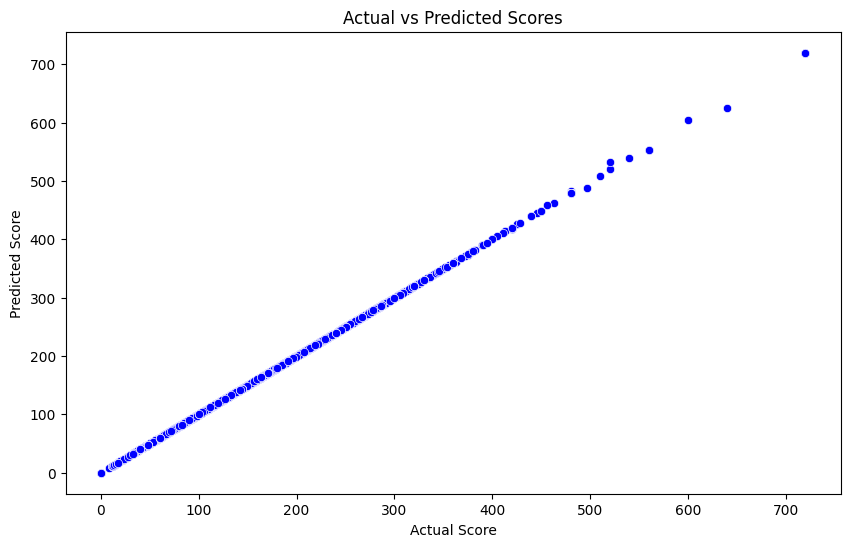

In [27]:
# Visualization 1: Actual vs Predicted Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Scores')
plt.show()

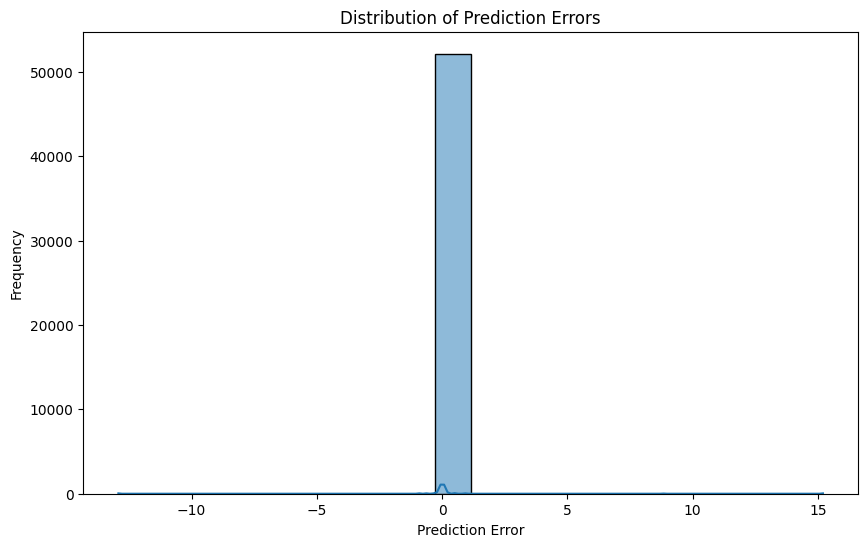

In [28]:
# Visualization 2: Distribution of Predicted Score Errors
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

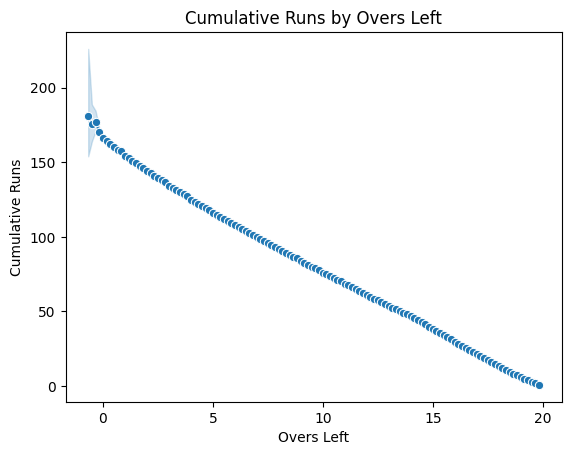

In [29]:
# Visualization 3: Cumulative Runs Over Time (by overs)
sns.lineplot(data=data, x="overs_left", y="cumulative_runs", marker='o')
plt.title("Cumulative Runs by Overs Left")
plt.xlabel("Overs Left")
plt.ylabel("Cumulative Runs")
plt.show()

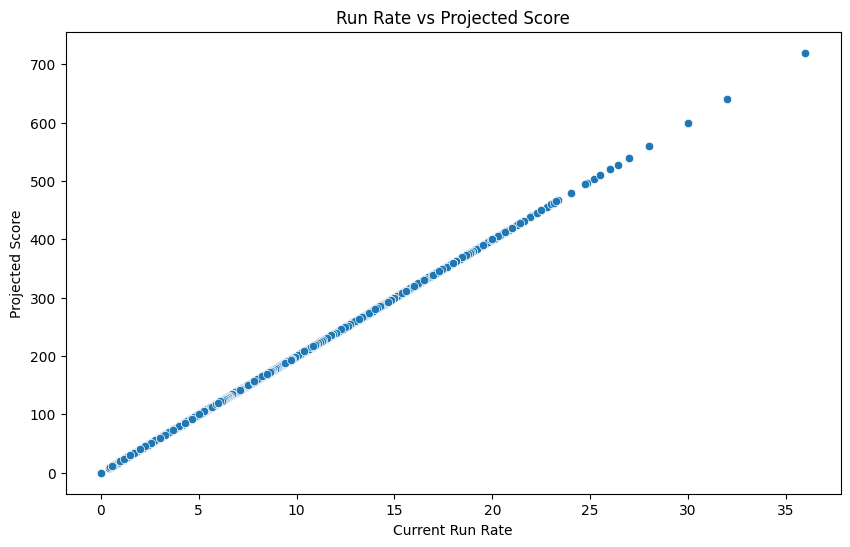

In [30]:
# Visualization 4: Run Rate vs Projected Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="current_run_rate", y="projected_score")
plt.title("Run Rate vs Projected Score")
plt.xlabel("Current Run Rate")
plt.ylabel("Projected Score")
plt.show()

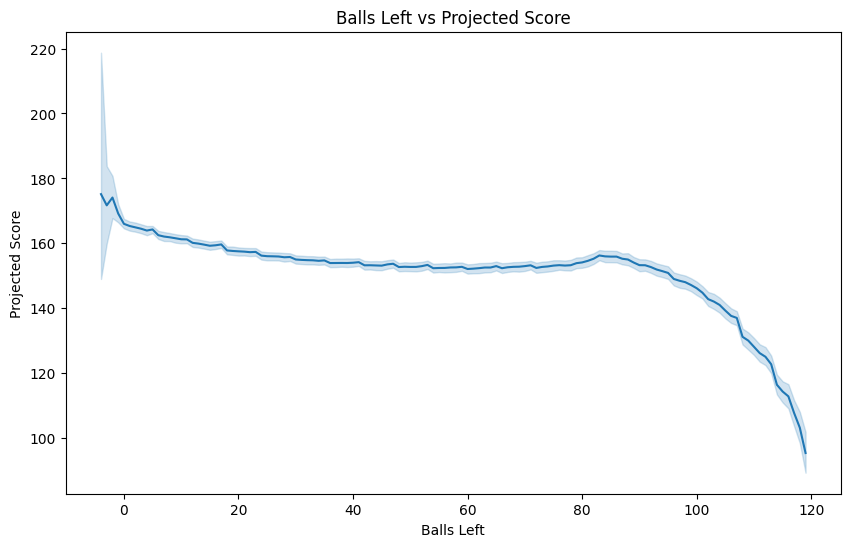

In [31]:
# Visualization 5: Balls Left vs Projected Score
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="balls_left", y="projected_score")
plt.title("Balls Left vs Projected Score")
plt.xlabel("Balls Left")
plt.ylabel("Projected Score")
plt.show()

In [32]:
# Step 5: Taking User Input and Generating Prediction
def predict_final_score(cumulative_runs, overs_left, balls_left, current_run_rate):
    features = np.array([[cumulative_runs, overs_left, balls_left, current_run_rate]])
    prediction = model.predict(features)
    return round(prediction[0])

In [39]:
# Getting input from the user
print("Cricket Score Prediction System")
cumulative_runs = float(input("Enter the current cumulative runs: "))
overs_left = float(input("Enter the number of overs left: "))
balls_left = int(input("Enter the number of balls left: "))
current_run_rate = cumulative_runs / (20 - overs_left)  # assuming a T20 match

predicted_score = predict_final_score(cumulative_runs, overs_left, balls_left, current_run_rate)
print(f"Predicted Final Score: {predicted_score}")

Cricket Score Prediction System


Enter the current cumulative runs:  200
Enter the number of overs left:  1
Enter the number of balls left:  6


Predicted Final Score: 211


S:\Klaus\MSR\Seenu's\Projects\Movie Reco\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
